In [2]:
import pandas as pd
import json
import os
from datetime import datetime
# 导入核心功能模块
from Handle_csv.handle import (
    get_navigation_info,
    get_target_info,
    intention_recognize,
    analyze_dataframe
)
from Handle_csv.config import Config
# 导入日志模块
from logger_setup import setup_logging

In [3]:

# 设置日志
logger = setup_logging()
# 初始化配置（包含日志器）
config = Config(logger)
def load_single_file_from_path(file_path):
    """从本地路径加载CSV文件为DataFrame"""
    try:
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"文件不存在: {file_path}")
        df = pd.read_csv(file_path)
        print(f"成功加载文件: {file_path}，数据量: {len(df)}行")
        return df
    except Exception as e:
        logger.error(f"加载文件 {file_path} 失败", exc_info=True)
        raise e
# 测试用CSV路径（替换为你的实际文件路径）
test_csv_path = "/Users/lichen18/Documents/Project/Data_mining/data/all_sequence_HLX14B178R0001811_merged.csv"  

In [4]:
"""测试核心功能函数"""
# 1. 加载数据
df = load_single_file_from_path(test_csv_path)

# 2. 基础导航信息分析
print("\n===== 开始导航信息分析 =====")
navi_info = get_navigation_info(df, config)
print("导航信息生成完成")


成功加载文件: /Users/lichen18/Documents/Project/Data_mining/data/all_sequence_HLX14B178R0001811_merged.csv，数据量: 3765行

===== 开始导航信息分析 =====
导航信息生成完成


In [5]:

# 3. 用户基础标签分析
print("\n===== 开始用户基础标签分析 =====")
user_feature_label = get_target_info(navi_info, 'user_basic_feature_label')
print("用户基础标签表格:")
print(user_feature_label.show_basic_feature_label())  # 假设该方法返回可打印的表格数据



===== 开始用户基础标签分析 =====
type basic_features_labels_mapping:<class 'dict'>
{'规律性行程': '', '规律行程距离': '', '规律行程耗时': ''}
<class 'dict'>
用户基础标签表格:
feature    基础信息              时间规律                 空间范围          目的地偏好    通勤基础  \
label       居住地        工作地 出行周期偏好 出行时段偏好 高峰出行模式 单次出行距离   活动区域 高频目的地类型   规律性行程   
0        金地西郊风华  无法确认用户工作地    均衡型    均衡型  错峰出行者  均衡复合型  多区域活动     住宅区  无规律性行程   

feature               通勤空间                  工作习惯  
label   规律行程距离 规律行程耗时 通勤方向                  工作时长  
0            无      无  待实现  work_time_list is []  


In [6]:

# # 4. 用户意图识别
# print("\n===== 开始用户意图识别 =====")
# user_intention = intention_recognize(df, config)
# print("用户意图识别结果:")
# print(json.dumps(user_intention, ensure_ascii=False, indent=2))


In [7]:

# 5. 表格数据统计信息
print("\n===== 开始表格数据统计 =====")
table_stats = analyze_dataframe(df)
print("表格统计信息:")
print(json.dumps(table_stats, ensure_ascii=False, indent=2))



===== 开始表格数据统计 =====
表格统计信息:
"{\n  \"行数\": 3765,\n  \"列数\": 18,\n  \"列名\": [\n    \"app_source\",\n    \"front_page\",\n    \"source\",\n    \"action_type\",\n    \"wake_up_location\",\n    \"screen_id\",\n    \"operate_target\",\n    \"input\",\n    \"voice_dc\",\n    \"taskmaster_actionInfo\",\n    \"str_status_json\",\n    \"vin\",\n    \"format_time_ms\",\n    \"json_all\",\n    \"event_key\",\n    \"desc\",\n    \"original_timestamp\",\n    \"status_json\"\n  ],\n  \"数据类型\": {\n    \"app_source\": \"object\",\n    \"front_page\": \"object\",\n    \"source\": \"object\",\n    \"action_type\": \"object\",\n    \"wake_up_location\": \"object\",\n    \"screen_id\": \"object\",\n    \"operate_target\": \"object\",\n    \"input\": \"object\",\n    \"voice_dc\": \"object\",\n    \"taskmaster_actionInfo\": \"float64\",\n    \"str_status_json\": \"object\",\n    \"vin\": \"object\",\n    \"format_time_ms\": \"object\",\n    \"json_all\": \"object\",\n    \"event_key\": \"object\",\n    \"

In [8]:

# 6. 导航地点信息
print("\n===== 开始导航地点信息分析 =====")
navigation_poi = get_target_info(navi_info, 'navigation_json')
print("导航地点信息:")
print(json.dumps(navigation_poi, ensure_ascii=False, indent=2))



===== 开始导航地点信息分析 =====
Processing navigation scenario...
导航地点信息:
[
  {
    "start_location": "121.353299,31.158869",
    "poi": "逸仙程桥敬老院(哈密路分院)",
    "type": "养老院",
    "poi_location": "121.25387996435163,31.111455352535565",
    "start_time": "2025-06-20 17:22:10.305",
    "end_time": "2025-06-20 18:08:50.181"
  },
  {
    "start_location": "121.25387996435163,31.111455352535565",
    "poi": "华敏世纪广场",
    "type": "商业广场",
    "poi_location": "121.370007,31.192397",
    "start_time": "2025-06-20 19:23:40.306",
    "end_time": "2025-06-20 19:49:18.195"
  },
  {
    "start_location": "121.370007,31.192397",
    "poi": "金地西郊风华",
    "type": "住宅区",
    "poi_location": "121.434522,31.2165",
    "start_time": "2025-06-20 22:43:23.708",
    "end_time": "2025-06-20 23:24:45.718"
  },
  {
    "start_location": "121.434522,31.2165",
    "poi": "上海市浦东新区蓝村路518号",
    "type": "地址",
    "poi_location": "121.25388,31.111455",
    "start_time": "2025-06-21 16:02:44.581",
    "end_time": "2025-06-21 17

In [9]:

# # 7. 用户整体分析画像
# print("\n===== 开始用户整体画像分析 =====")
# user_profile = get_target_info(navi_info, 'user_overall_profile')
# print("用户整体画像:")
# print(json.dumps(user_profile, ensure_ascii=False, indent=2))



===== 开始路线时序图生成 =====
Drawinging navigation scenario...
路线时序图已保存为: timeline_all_sequence_HLX14B178R0001811_merged.csv.png

===== 开始路线图生成 =====
Drawinging route scenario...
json_data =  [{'start_location': '121.353299,31.158869', 'poi': '逸仙程桥敬老院(哈密路分院)', 'type': '养老院', 'poi_location': '121.25387996435163,31.111455352535565', 'start_time': '2025-06-20 17:22:10.305', 'end_time': '2025-06-20 18:08:50.181'}, {'start_location': '121.25387996435163,31.111455352535565', 'poi': '华敏世纪广场', 'type': '商业广场', 'poi_location': '121.370007,31.192397', 'start_time': '2025-06-20 19:23:40.306', 'end_time': '2025-06-20 19:49:18.195'}, {'start_location': '121.370007,31.192397', 'poi': '金地西郊风华', 'type': '住宅区', 'poi_location': '121.434522,31.2165', 'start_time': '2025-06-20 22:43:23.708', 'end_time': '2025-06-20 23:24:45.718'}, {'start_location': '121.434522,31.2165', 'poi': '上海市浦东新区蓝村路518号', 'type': '地址', 'poi_location': '121.25388,31.111455', 'start_time': '2025-06-21 16:02:44.581', 'end_time': '2025-06-21 

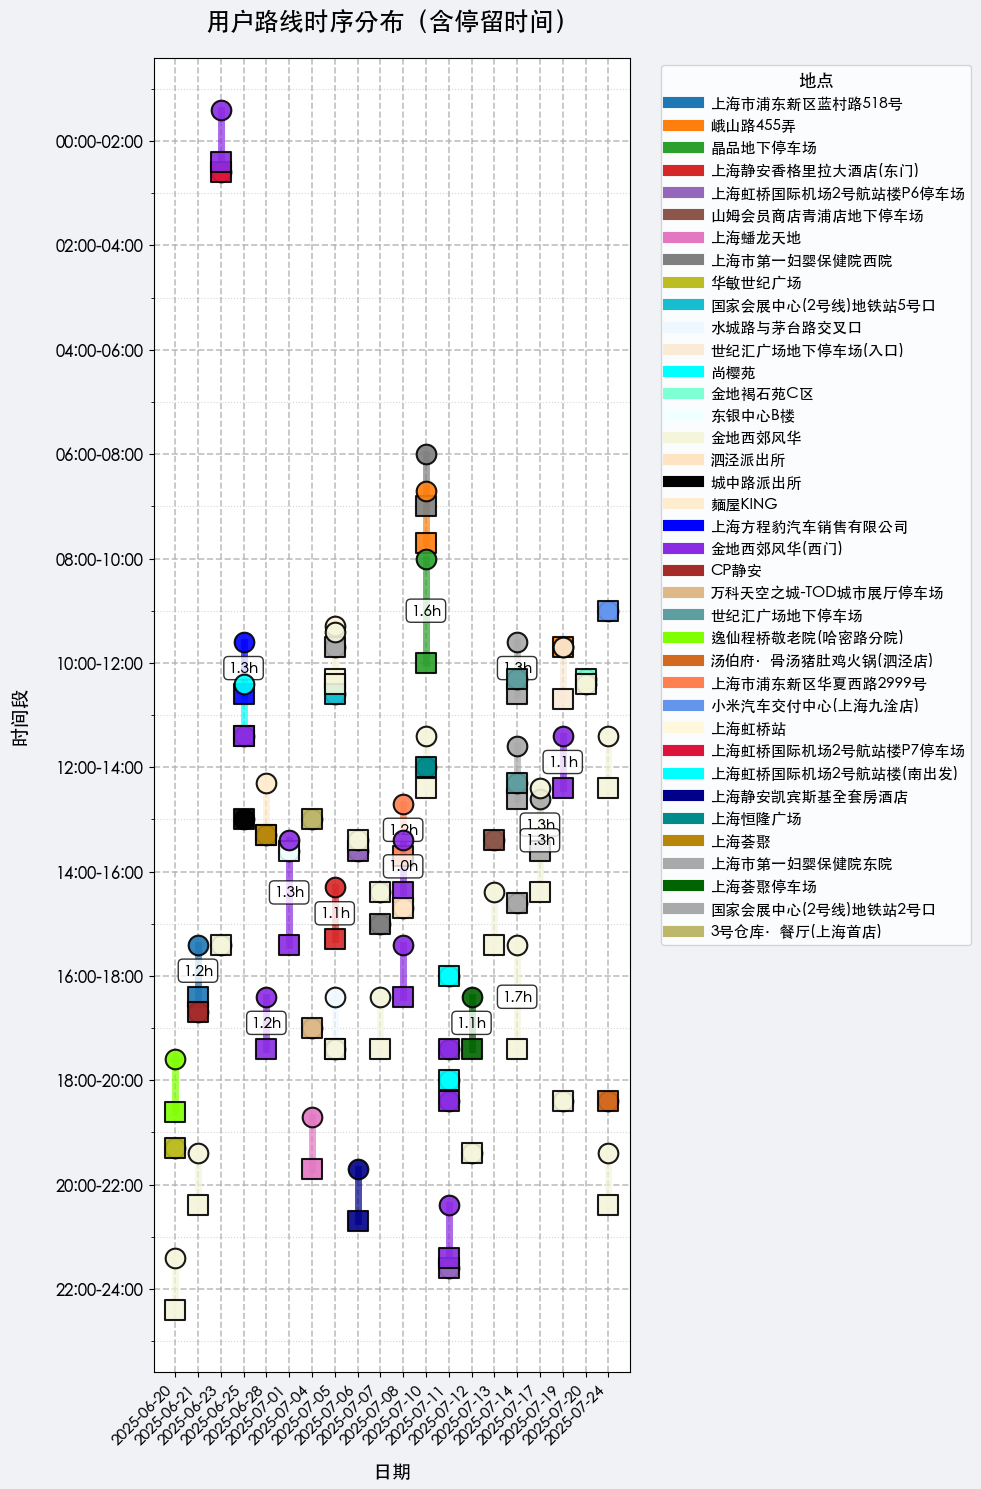

In [ ]:

# 8. 路线时序图和路线图（如果需要保存图片）
try:
    print("\n===== 开始路线时序图生成 =====")
    timeline_plot = get_target_info(navi_info, 'nagivation_draw')
    # 保存时序图（如果返回的是图片二进制数据）
    if timeline_plot:
        with open(f"timeline_{os.path.basename(test_csv_path)}.png", "wb") as f:
            f.write(timeline_plot.getvalue())  # 假设返回的是BytesIO对象
        print(f"路线时序图已保存为: timeline_{os.path.basename(test_csv_path)}.png")
except Exception as e:
    logger.error("路线时序图生成失败", exc_info=True)



In [12]:
print("\n===== 开始路线图生成 =====")
route_map = get_target_info(navi_info, 'route_map')
# 保存路线图
if route_map:
    with open(f"route_map_{os.path.basename(test_csv_path)}.png", "wb") as f:
        f.write(route_map)  # 假设返回的是图片二进制数据
    print(f"路线图已保存为: route_map_{os.path.basename(test_csv_path)}.png")


===== 开始路线图生成 =====
Drawinging route scenario...
json_data =  [{'start_location': '121.353299,31.158869', 'poi': '逸仙程桥敬老院(哈密路分院)', 'type': '养老院', 'poi_location': '121.25387996435163,31.111455352535565', 'start_time': '2025-06-20 17:22:10.305', 'end_time': '2025-06-20 18:08:50.181'}, {'start_location': '121.25387996435163,31.111455352535565', 'poi': '华敏世纪广场', 'type': '商业广场', 'poi_location': '121.370007,31.192397', 'start_time': '2025-06-20 19:23:40.306', 'end_time': '2025-06-20 19:49:18.195'}, {'start_location': '121.370007,31.192397', 'poi': '金地西郊风华', 'type': '住宅区', 'poi_location': '121.434522,31.2165', 'start_time': '2025-06-20 22:43:23.708', 'end_time': '2025-06-20 23:24:45.718'}, {'start_location': '121.434522,31.2165', 'poi': '上海市浦东新区蓝村路518号', 'type': '地址', 'poi_location': '121.25388,31.111455', 'start_time': '2025-06-21 16:02:44.581', 'end_time': '2025-06-21 17:13:30.987'}, {'start_location': '121.25388,31.111455', 'poi': 'CP静安', 'type': '商业广场', 'poi_location': '121.522138,31.210